## EJERCICIO PRACTICO 1
## *Maestría en Gerencia de Datos y Negocios*
Jose David Gutiérrez Romero

**Instrucciones** 
1. Proyecto NetworkX\
Escoge un dataset de tu interés (público o datos con los que estás familiarizado). Recuerda que para trabajar con grafos, las entidades, las relaciones entre sí y sus propiedades deben estar bien definidas. Plantea al menos 3 preguntas de negocio que puedan resolverse en base a consultas analíticas y/o métricas de grafos.
- Trabaja con al menos 1000 nodos (0.5)
- Trabaja con al menos 2000 aristas (0.5)
- Combina el potencial de NetworkX con Gephi (1.0)
- Analiza tus resultados (0.5)

In [1]:
##El dataset es una base de datos con detalle de los destinos, y orignenes de vuelos, rutas, entre otra información de los vuelos en Estados Unidos

In [22]:
##Pregunta de negocio 1: ¿Cuál o cuáles son los aeropuertos con más vuelos de salida y de llegada en Estados Unidos?
##Pregunta de negocio 2: ¿En ese o esos aeropuertos con más vuelos de salida y de llagada hay vuelos directos desde y hacia Miami y Los Angeles? Si no hay vuelos directos, cuales es la mejor ruta para llegar a Miami y los Angeles?
##Pregunta de negocio 3: ¿Cuál o cuáles son los aeropuertos (de tránsito) más importantes para conectar la mayoría de los aeropuertos de los Estados Unidos?

In [2]:
# INSTALACIONES DE PAQUETES
import networkx as nx
import requests
import json

In [3]:
# Carcagamos el dataset--
url = 'https://api.aviationapi.com/v1/preferred-routes'
response = requests.get(url)
print(response)

#Mostramos el primero resultado del dataset "RUTAS PREFERIDAS" en la respuesta en formato JSON
print(json.dumps(response.json()[0], indent=1))
print()


for (k,v) in response.headers.items():
    print(k, "=>", v)

<Response [200]>
{
 "origin": "ABE",
 "route": "ABE FJC ARD CYN ACY",
 "destination": "ACY",
 "hours1": null,
 "hours2": null,
 "hours3": null,
 "type": "TEC",
 "area": null,
 "altitude": "5000",
 "aircraft": null,
 "flow": null,
 "seq": 1,
 "d_artcc": "ZNY",
 "a_artcc": "ZDC"
}

Date => Wed, 08 Nov 2023 00:25:02 GMT
Content-Type => application/json
Transfer-Encoding => chunked
Connection => keep-alive
Cache-Control => no-cache, private, max-age=172800
x-ratelimit-limit => 60
x-ratelimit-remaining => 59
expires => Fri, 10 Nov 2023 00:25:01 GMT
vary => User-Agent
CF-Cache-Status => DYNAMIC
Report-To => {"endpoints":[{"url":"https:\/\/a.nel.cloudflare.com\/report\/v3?s=CaKtX6AQYnYAaW0shcCLl69rRHyWRlw6osVz%2FuC2PRGLC%2F3htpUl%2BPGFjvB4%2F4epnilLo57llvY9SIykRIpqTjRDlzQCM2ACCX69Tja9D8X43mkLRNUssS%2FC5M1G4vv2cq5yD2GY"}],"group":"cf-nel","max_age":604800}
NEL => {"success_fraction":0,"report_to":"cf-nel","max_age":604800}
Server => cloudflare
CF-RAY => 8229ad245a8e3358-MIA
Content-Encoding =>

In [4]:
#Analizamos y probamos el dataset
len(response.json())

11380

In [5]:
# Hacemos una prueba del primero aeropuerto de origen que aparece en el dataset
response.json()[0]['origin']

'ABE'

In [6]:
# Hacemos una prueba del primero aeropuerto de destino que aparece en el dataset
response.json()[0]['destination']

'ACY'

In [6]:
#Identificamos cuántos aeropuertos en total estan en el dataset (no incluimos los repetidos)
ORIGIN = 'origin'
DESTINATION = 'destination'

url = 'https://api.aviationapi.com/v1/preferred-routes'
response = requests.get(url)

# Verificamos nuevamente si la instalación del dataset fue exitosa (código de respuesta 200)
if response.status_code == 200:
    data = response.json()

    # Extraemos los aeropuertos de origen y destino
    origin = [item.get(ORIGIN) for item in data]
    destination = [item.get(DESTINATION) for item in data]

    # Filtra aeropuertos únicos
    aeropuertos = set(origin + destination)

    print("Número de aeropuertos:", len(aeropuertos))
else:
    print(f"Hay error {response.status_code}")

Número de aeropuertos: 584


In [7]:
# MOSTRAMOS LOS AEROPUERTOS DEL DATASET
print(aeropuertos)

{'TYS', 'RICCS', 'ASH', 'MDCS', 'COPLY', 'JAC', 'VRB', 'TNCE', 'TRI', 'CXY', 'HPN', 'MIILS', 'VKZ', 'JAN', 'LARIE', 'LCH', 'TED', 'HST', 'F70', 'NODLE', 'HGR', 'SAT', 'RAYVO', 'POLYY', 'APF', 'DUNEE', 'MRB', 'OCS', 'TRIXY', 'PIH', 'PAAGE', 'FMY', 'GOONS', 'VIYAP', 'X51', 'TRM', 'PHF', 'HAROB', 'KJOHN', 'AUG', 'PWK', 'GSO', 'TJBQ', 'SHAUP', 'DOV', 'TUS', 'YNG', 'IAH', 'ISP', 'LCK', 'OAJ', 'MIV', 'DBS', 'AUN', 'DENNN', 'TLPL', 'BOI', 'PSF', 'MCI', 'DAY', 'OMA', 'SUS', 'ROC', 'OWD', 'BBG', 'BCE', 'ESN', 'FLRDA', 'PVD', 'FEPOT', 'HFD', 'TJIG', 'JNC', 'LYH', 'DET', 'TNCM', 'HSV', 'IDOLS', 'LCAPE', 'TUL', 'SEA', 'RIFLE', 'JOBOC', 'ELD', 'AMA', 'RDU', 'EMT', 'BWI', 'RKD', 'RYCKI', 'MLB', 'PIT', 'WHP', 'ENE', 'OSU', 'BDL', 'MPV', 'CYUL', 'MDW', 'LEX', 'SLC', 'MHT', 'BWZ', 'ANC', 'AGC', 'QUBIS', 'BUR', 'HZL', 'MRPIT', 'TBPB', 'HANAA', 'RIR', 'EWC', 'TSP', 'AVL', 'BAMMY', 'TJSJ', 'BEETS', 'GTU', 'BMI', 'IAG', 'CUDDY', 'SAC', 'OGS', 'BTR', 'ONT', 'EYW', 'NTD', 'BLENO', 'OMENS', 'ORD', 'NHK', 'CMH

In [8]:
# CREACION DEL GRAFO
ORIGIN = 'origin'
DESTINATION = 'destination'

url = 'https://api.aviationapi.com/v1/preferred-routes'
response = requests.get(url)

# Verificamos nuevamente si la solicitud fue exitosa (código de respuesta 200)
if response.status_code == 200:
    data = response.json()

    grafo = nx.DiGraph()

    # Extraemos los aeropuertos de origen y destino para hacerlos nodos del grafo
    for item in data:
        origin = item.get(ORIGIN)
        destination = item.get(DESTINATION)

        if origin:
            grafo.add_node(origin)
        if destination:
            grafo.add_node(destination)
    # Agregamos aristas entre los aeropuertos de origen y destino
    for item in data:
        origin = item.get(ORIGIN)
        destination = item.get(DESTINATION)
        
        if origin and destination:
            grafo.add_edge(origin, destination, type='vuelos')

    # Realizamos un análisis en el grafo, para saber cuantos nodos y aristas tenemos
    numero_de_aeropuertos = len(grafo.nodes)
    numero_de_rutas = len(grafo.edges)

    print(f"Número de aeropuertos: {numero_de_aeropuertos}")
    print(f"Número de rutas: {numero_de_rutas}")
else:
    print(f"Hay error {response.status_code}")

Número de aeropuertos: 584
Número de rutas: 6737


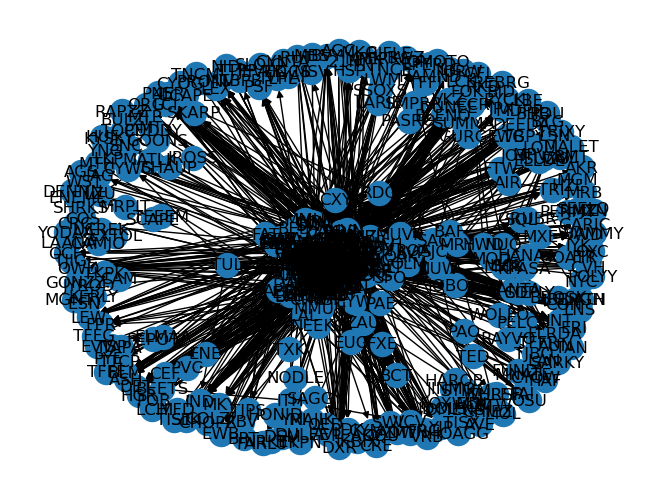

In [10]:
nx.draw(grafo, with_labels = True)

In [11]:
# Descargamos el grafo para analizarlo y modificarlo en GEPHI
archivo_gexf = "grafo_aeropuertos.gexf"

# Exporta el grafo a un archivo GEXF
nx.write_gexf(grafo, archivo_gexf)

print(f"Grafo listo a {archivo_gexf}")

Grafo listo a grafo_aeropuertos.gexf


In [12]:
# Un breve analisis a manera macro de incidencia de cada aeropuerto
grafo.degree

DiDegreeView({'ABE': 43, 'ACY': 79, 'ALB': 89, 'AVP': 26, 'BDL': 141, 'BWI': 182, 'DCA': 168, 'EWR': 254, 'FRG': 27, 'HAR': 3, 'HFD': 75, 'HPN': 179, 'IAD': 161, 'ILG': 8, 'LNS': 15, 'PHL': 167, 'PIT': 71, 'PNE': 26, 'RDG': 20, 'TEB': 109, 'ABQ': 6, 'AUS': 77, 'HOU': 126, 'IAH': 142, 'ORD': 173, 'ACK': 84, 'AUG': 49, 'BDR': 94, 'BED': 65, 'BGR': 60, 'BHB': 22, 'BOS': 188, 'BTV': 63, 'BUF': 49, 'CON': 22, 'DOV': 41, 'DXR': 26, 'EEN': 33, 'ELM': 23, 'ERI': 10, 'FOK': 33, 'GON': 78, 'ISP': 111, 'JFK': 198, 'LEB': 33, 'LGA': 208, 'MHT': 95, 'MMU': 48, 'ORH': 71, 'OWD': 24, 'PBI': 139, 'PSM': 80, 'PVD': 126, 'PWM': 77, 'RIC': 55, 'SWF': 70, 'SYR': 82, 'TTN': 16, 'WRI': 48, 'ADW': 21, 'ATL': 115, 'CXY': 29, 'EWB': 10, 'FLL': 164, 'HYA': 76, 'MCO': 133, 'MDT': 12, 'MMK': 6, 'MVY': 71, 'MYR': 19, 'OQU': 6, 'PVC': 26, 'RSW': 90, 'SBY': 12, 'SWL': 2, 'TAN': 1, 'TPA': 114, 'AIR': 2, 'MRB': 3, 'TRIXY': 2, 'AJO': 64, 'AVX': 75, 'BUR': 94, 'CMA': 103, 'CRQ': 64, 'FUL': 85, 'HHR': 99, 'LAX': 94, 'LGB

In [14]:
#Analizamos que cantidad de aeropuertos tienen más salidas a otros aeropuerto en base a la cantidad de aeropuertos del grafo
from operator import itemgetter
from IPython import display

degree_centrality = nx.degree_centrality(grafo)

top_5_degree_centrality = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)[:5]

print("Los 5 aeropuertos con mayores salidas:")
for node, centrality in top_5_degree_centrality:
    print(f"Nodo: {node}, Degree Centrality: {centrality}")

# Al tener una idea la cantidad de aeropuertos que tienen mayores salidas hacia otroa aeropuertos respondemos la pregunta 1 de negocio

Los 5 aeropuertos con mayores salidas:
Nodo: EWR, Degree Centrality: 0.43567753001715265
Nodo: LGA, Degree Centrality: 0.3567753001715266
Nodo: JFK, Degree Centrality: 0.33962264150943394
Nodo: BOS, Degree Centrality: 0.32246998284734135
Nodo: BWI, Degree Centrality: 0.31217838765008576


In [42]:
##Pregunta de negocio 1: ¿Cuál o cuáles son los aeropuertos con más vuelos de salida y de llegada en Estados Unidos?

# Calculamos el grado de arrivals y departures por cada aeropuerto
in_degree = dict(grafo.in_degree())
out_degree = dict(grafo.out_degree())

# Enconctramos el aeropuerto con el mayor número de departures and arrivals
nodo_max_arrivals = max(in_degree, key=in_degree.get)
max_arrivals = in_degree[nodo_max_arrivals]
nodo_max_departures = max(out_degree, key=out_degree.get)
max_departures = out_degree[nodo_max_departures]

print(f"Aeropuerto con el mayor número de arrivals: {nodo_max_arrivals} con {max_arrivals} arrivals de otros aeropuertos distintos.")
print(f"Aeropuerto con el mayor número de departures: {nodo_max_departures} con {max_departures} departures hacia otros aeropuertos distintos.")


Aeropuerto con el mayor número de arrivals: ORD con 93 arrivals de otros aeropuertos distintos.
Aeropuerto con el mayor número de departures: EWR con 162 departures hacia otros aeropuertos distintos.


**El aeropuerto de ORD (Chicago) en Estados Unidos, es el aeropuerto que mayor vuelos de llegada tiene (Este aeropuerto puede ser tanto como destino final como tránsito para otros destinos dentro de los Estados Unidos)** \
**El aeropuerto de EWR (New Jersey), es el aeropuerto que mayor vuelos de salidas tiene hacia otros destinos des los Estados Unidos.**

In [18]:
##Pregunta de negocio 2: ¿En ese o esos aeropuertos con más vuelos de salida y de llagada hay vuelos directos desde y hacia Miami y Los Angeles? Si no hay vuelos directos, cuales es la mejor ruta para llegar a Miami y los Angeles?

In [40]:
print(grafo['ORD'])
# Aquí podemos visualizar a todos los aeropuertos de donde vienen los vuelos hacia Chicago. 

{'ABE': {'type': 'vuelos'}, 'ACK': {'type': 'vuelos'}, 'ACY': {'type': 'vuelos'}, 'ADW': {'type': 'vuelos'}, 'ALB': {'type': 'vuelos'}, 'ATL': {'type': 'vuelos'}, 'AUS': {'type': 'vuelos'}, 'AVP': {'type': 'vuelos'}, 'BCT': {'type': 'vuelos'}, 'BDL': {'type': 'vuelos'}, 'BED': {'type': 'vuelos'}, 'BHM': {'type': 'vuelos'}, 'BNA': {'type': 'vuelos'}, 'BOS': {'type': 'vuelos'}, 'BTV': {'type': 'vuelos'}, 'BUF': {'type': 'vuelos'}, 'BWI': {'type': 'vuelos'}, 'CAE': {'type': 'vuelos'}, 'CAK': {'type': 'vuelos'}, 'CHA': {'type': 'vuelos'}, 'CHS': {'type': 'vuelos'}, 'CLE': {'type': 'vuelos'}, 'CLT': {'type': 'vuelos'}, 'CMH': {'type': 'vuelos'}, 'CRW': {'type': 'vuelos'}, 'CVG': {'type': 'vuelos'}, 'DAY': {'type': 'vuelos'}, 'DCA': {'type': 'vuelos'}, 'DEN': {'type': 'vuelos'}, 'DET': {'type': 'vuelos'}, 'DFW': {'type': 'vuelos'}, 'DTW': {'type': 'vuelos'}, 'EVV': {'type': 'vuelos'}, 'EWR': {'type': 'vuelos'}, 'FLL': {'type': 'vuelos'}, 'GSO': {'type': 'vuelos'}, 'GSP': {'type': 'vuelos'}, 

**Por ejemplo, pasajeros de Miami (MIA) pueden ir en vuelo directo a Chicago, pero pasajerso de Los Angeles (LAX) no lo pueden hacer, necesariamente necesitan hacer esacala en algunas de estos aeropuertos**

In [26]:
#La mejor ruta para ir a MIA-ORD / ORD-MIA
aeropuerto_origen = 'ORD'
aeropuerto_destino = 'MIA'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")
    
aeropuerto_origen = 'MIA'
aeropuerto_destino = 'ORD'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")

Ruta más corta desde ORD a MIA:
['ORD', 'MIA']
Distancia de la ruta más corta: 1 aeropuertos
Ruta más corta desde MIA a ORD:
['MIA', 'ORD']
Distancia de la ruta más corta: 1 aeropuertos


**Tanto en la ruta ORD-MIA como MIA-ORD hay vuelos directos**

In [28]:
#La mejor ruta para ir a LAX-ORD / ORD-LAX
aeropuerto_origen = 'ORD'
aeropuerto_destino = 'LAX'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")
    
aeropuerto_origen = 'LAX'
aeropuerto_destino = 'ORD'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")

Ruta más corta desde ORD a LAX:
['ORD', 'BOS', 'LAX']
Distancia de la ruta más corta: 2 aeropuertos
Ruta más corta desde LAX a ORD:
['LAX', 'AUS', 'BOS', 'ORD']
Distancia de la ruta más corta: 3 aeropuertos


**La ruta mas corta para ORD-LAX es : ORD -BOS- LAX (1 PARADA)** \
**La ruta mas corta para LAX-ORD es : LAX-AUS-BOS-ORD (2 PARADA)**

In [20]:
print(grafo['EWR'])
# Aquí podemos visualizar a todos los aeropuertos a donde van los vuelos que salen de New Jersey.

{'ABE': {'type': 'vuelos'}, 'ACK': {'type': 'vuelos'}, 'ACY': {'type': 'vuelos'}, 'AGC': {'type': 'vuelos'}, 'AKR': {'type': 'vuelos'}, 'ALB': {'type': 'vuelos'}, 'APF': {'type': 'vuelos'}, 'ASH': {'type': 'vuelos'}, 'ATL': {'type': 'vuelos'}, 'AUG': {'type': 'vuelos'}, 'AUS': {'type': 'vuelos'}, 'AVP': {'type': 'vuelos'}, 'BCT': {'type': 'vuelos'}, 'BDL': {'type': 'vuelos'}, 'BDR': {'type': 'vuelos'}, 'BED': {'type': 'vuelos'}, 'BGM': {'type': 'vuelos'}, 'BGR': {'type': 'vuelos'}, 'BHB': {'type': 'vuelos'}, 'BHM': {'type': 'vuelos'}, 'BID': {'type': 'vuelos'}, 'BLM': {'type': 'vuelos'}, 'BNA': {'type': 'vuelos'}, 'BOS': {'type': 'vuelos'}, 'BTV': {'type': 'vuelos'}, 'BUF': {'type': 'vuelos'}, 'BVY': {'type': 'vuelos'}, 'BWI': {'type': 'vuelos'}, 'CAK': {'type': 'vuelos'}, 'CHA': {'type': 'vuelos'}, 'CHO': {'type': 'vuelos'}, 'CHS': {'type': 'vuelos'}, 'CLE': {'type': 'vuelos'}, 'CLT': {'type': 'vuelos'}, 'CMH': {'type': 'vuelos'}, 'CON': {'type': 'vuelos'}, 'CRE': {'type': 'vuelos'}, 

**Por ejemplo, desde este aeropuerto no hay vuelos directo para Los Angeles (LAX), pero si hay vuelo directo hacia Miami (MIA)**

In [31]:
#La mejor ruta para ir a MIA-EWR / EWR-MIA
aeropuerto_origen = 'EWR'
aeropuerto_destino = 'MIA'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")
    
aeropuerto_origen = 'MIA'
aeropuerto_destino = 'EWR'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")

Ruta más corta desde EWR a MIA:
['EWR', 'MIA']
Distancia de la ruta más corta: 1 aeropuertos
Ruta más corta desde MIA a EWR:
['MIA', 'EWR']
Distancia de la ruta más corta: 1 aeropuertos


**Tanto en la ruta EWR-MIA como MIA-EWR hay vuelos directos**

In [33]:
#La mejor ruta para ir a LAX-EWR / EWR-LAX
aeropuerto_origen = 'EWR'
aeropuerto_destino = 'LAX'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")
    
aeropuerto_origen = 'LAX'
aeropuerto_destino = 'EWR'

try:
    ruta_mas_corta = nx.shortest_path(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    distancia_ruta_corta = nx.shortest_path_length(grafo, source=aeropuerto_origen, target=aeropuerto_destino)
    
    print(f"Ruta más corta desde {aeropuerto_origen} a {aeropuerto_destino}:")
    print(ruta_mas_corta)
    print(f"Distancia de la ruta más corta: {distancia_ruta_corta} aeropuertos")

except nx.NetworkXNoPath:
    print(f"No hay ruta entre {aeropuerto_origen} y {aeropuerto_destino}")

Ruta más corta desde EWR a LAX:
['EWR', 'BOS', 'LAX']
Distancia de la ruta más corta: 2 aeropuertos
Ruta más corta desde LAX a EWR:
['LAX', 'AUS', 'EWR']
Distancia de la ruta más corta: 2 aeropuertos


**La ruta mas corta para EWR-LAX es : EWR -BOS- LAX (1 PARADA)** \
**La ruta mas corta para LAX-EWR es : LAX-AUS-EWR (1 PARADA)**

In [37]:
##Pregunta de negocio 3: ¿Cuál o cuáles son los aeropuertos (de tránsito) más importantes para conectar la mayoría de los aeropuertos de los Estados Unidos?

betweenness_centrality = nx.betweenness_centrality(grafo)

# Ordenamos los aeropuertos que conectan con la mayor cantidad de aeropuertos
top_5_betweenness = sorted(betweenness_centrality.items(), key=itemgetter(1), reverse=True)[:5]

print("Los 5 aeropuertos con mayor importancia en la conexión de aeropuertos en Estados Unidos:")
for node, centrality in top_5_betweenness:
    print(f"Aeropuerto: {node}, Betweenness Centrality: {centrality}")

Los 5 aeropuertos con mayor importancia en la conexión de aeropuertos en Estados Unidos:
Aeropuerto: AUS, Betweenness Centrality: 0.06179885829790178
Aeropuerto: EWR, Betweenness Centrality: 0.03685625106112669
Aeropuerto: ORD, Betweenness Centrality: 0.03412382237361793
Aeropuerto: IAH, Betweenness Centrality: 0.0321345208676343
Aeropuerto: LAX, Betweenness Centrality: 0.02908350115564607


**Podemos identificar que los 5 aeropuerto más importantes en Estados Unidos para conectar con otros aeropuertos son 'AUS','EWR', 'ORD', 'IAH', 'LAX'**